In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
zomato_df = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")
zomato_df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Info and Describe:

In [3]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

- data type need to be fixed and there are missing values
- can drop url columns since there are columns with data of location

In [4]:
# Number of unique classes in each object column
zomato_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending = False)

url                            51717
reviews_list                   22513
phone                          14926
address                        11495
menu_item                       9098
name                            8792
dish_liked                      5271
cuisines                        2723
location                          93
rest_type                         93
approx_cost(for two people)       70
rate                              64
listed_in(city)                   30
listed_in(type)                    7
online_order                       2
book_table                         2
dtype: int64

- can drop reviews_list and phone columns specially they have lot of variances
- can drop url and  address columns since there are location and city columns

In [5]:
zomato_df['menu_item'].to_list()[:10] # check 10 rows of menu_item to see sample value

['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]']

In [6]:
len(zomato_df[zomato_df['menu_item']=='[]'])/zomato_df.shape[0]*100

76.60343794110254

- can delete menu_item bacause 74% of data is blank although this column has no missing values

# Missing and duplicated values

In [7]:
# Missing values statistics
total = zomato_df.isnull().sum().sort_values(ascending = False)
percent = ((zomato_df.isna().sum()/len(zomato_df))*100).sort_values(ascending = False)
missing_values=pd.concat([total, percent], axis=1, keys=['Total_na', 'Percent_na'])
missing_values.reset_index()

,index,Total_na,Percent_na
0,dish_liked,28078,54.291626
1,rate,7775,15.033741
2,phone,1208,2.335789
3,approx_cost(for two people),346,0.669026
4,rest_type,227,0.438927
5,cuisines,45,0.087012
6,location,21,0.040606
7,listed_in(type),0,0.000000
8,menu_item,0,0.000000
9,reviews_list,0,0.000000


- can drop 'dish_liked' as more than 50% of data is missing

In [8]:
zomato_df.drop(['url','phone','dish_liked','address','reviews_list','menu_item'],axis=1, inplace=True)

In [9]:
#Remove the NaN values from the dataset
zomato_df.isnull().sum()
zomato_df.dropna(how='any',inplace=True)

In [10]:
#checking duplicate value
zomato_df.duplicated().sum()

86

In [11]:
zomato_df[zomato_df.duplicated(keep=False)]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
553,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out,Banashankari
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out,Banashankari
2195,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,Dine-out,Bannerghatta Road
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,Dine-out,Bannerghatta Road
3747,The Fisherman's Wharf,Yes,Yes,4.4/5,4099,Sarjapur Road,"Casual Dining, Bar","Seafood, Goan, North Indian, Continental, Asian","1,400",Buffet,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...
48777,ShakesBierre,No,Yes,4.4 /5,409,Brigade Road,"Microbrewery, Casual Dining","Asian, Continental, European, North Indian","1,500",Drinks & nightlife,Residency Road
49050,Sri Ganesh Juice Junction,Yes,No,3.5 /5,6,Bellandur,Beverage Shop,"Juices, Fast Food",200,Delivery,Sarjapur Road
49193,Sri Ganesh Juice Junction,Yes,No,3.5 /5,6,Bellandur,Beverage Shop,"Juices, Fast Food",200,Delivery,Sarjapur Road
50900,Nawab Di Biryani,Yes,No,NEW,0,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400,Delivery,Whitefield


In [12]:
# dropping the duplicates value from the dataset
zomato_df.drop_duplicates(inplace=True)

In [13]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43447 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43447 non-null  object
 1   online_order                 43447 non-null  object
 2   book_table                   43447 non-null  object
 3   rate                         43447 non-null  object
 4   votes                        43447 non-null  int64 
 5   location                     43447 non-null  object
 6   rest_type                    43447 non-null  object
 7   cuisines                     43447 non-null  object
 8   approx_cost(for two people)  43447 non-null  object
 9   listed_in(type)              43447 non-null  object
 10  listed_in(city)              43447 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


In [14]:
# votes is the only numerical column in data to describe
zomato_df.describe()

,votes
count,43447.000000
mean,333.777430
std,863.748802
min,0.000000
25%,17.000000
50%,64.000000
75%,254.000000
max,16832.000000


In [15]:
zomato_df['votes'].quantile([0.2,0.5,0.75,0.8,0.9,0.99])

0.20      12.0
0.50      64.0
0.75     254.0
0.80     358.0
0.90     827.0
0.99    4096.0
Name: votes, dtype: float64

In [16]:
len(zomato_df[zomato_df['votes']>10000])

38

- outliers in votes

# Data types and values transformations

In [17]:
zomato_df1=zomato_df.copy()

In [18]:
#renaming the columns
zomato_df1=zomato_df1.rename(columns={'approx_cost(for two people)':'cost',
                                    'listed_in(type)':'type',
                                    'listed_in(city)':'city'})

### 1. Cost column

In [19]:
zomato_df1['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [20]:
# "Cost" remove comma and convert data type to float
zomato_df1['cost']=zomato_df1['cost'].astype(str)
zomato_df1['cost'] = zomato_df1['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato_df1['cost'] = zomato_df1['cost'].astype(float)

In [21]:
zomato_df1['cost'].describe()

count    43447.000000
mean       368.599473
std        240.564330
min          1.000000
25%        200.000000
50%        350.000000
75%        500.000000
max        950.000000
Name: cost, dtype: float64

In [22]:
zomato_df1[zomato_df1['cost']<=5]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
67,Gustoes Beer House,No,No,4.1/5,868,Banashankari,Pub,"Continental, Italian, Mexican, North Indian, C...",1.2,Delivery,Banashankari
119,K27 - The Pub,No,No,3.1/5,30,Banashankari,Bar,"Chinese, North Indian",1.0,Delivery,Banashankari
166,Patio 805,Yes,Yes,4.1/5,364,Jayanagar,Casual Dining,"Thai, Vietnamese, Asian, Chinese",1.2,Delivery,Banashankari
207,Chutney Chang,Yes,Yes,4.1/5,2339,Jayanagar,Casual Dining,"North Indian, Chinese, BBQ",1.5,Delivery,Banashankari
217,Toscano,Yes,Yes,4.3/5,1129,Jayanagar,Casual Dining,"Italian, Salad",1.3,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Finger Food,2.0,Pubs and bars,Whitefield
51708,Keys Cafe - Keys Hotel,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Chinese, Continental, North Indian",1.2,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,1.5,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2.5,Pubs and bars,Whitefield


### 2. Rate column

In [23]:
zomato_df1['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

- some values as 'NEW' and '-' need to be removed

In [24]:
zomato_df1.loc[zomato_df1.rate =='-']

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
3068,House of Tasty Food,No,No,-,0,Wilson Garden,Quick Bites,North Indian,400.0,Delivery,Basavanagudi
3373,Right Pizza,Yes,No,-,0,Basavanagudi,Quick Bites,Pizza,300.0,Dine-out,Basavanagudi
3378,Mezban Family Restaurant,Yes,No,-,0,Basavanagudi,Quick Bites,"Chinese, North Indian",300.0,Dine-out,Basavanagudi
3387,Mota Bawarchi,No,No,-,0,Basavanagudi,Quick Bites,"North Indian, Biryani, Fast Food",300.0,Dine-out,Basavanagudi
3396,Aahar Cafe,No,No,-,0,Basavanagudi,Quick Bites,South Indian,100.0,Dine-out,Basavanagudi
...,...,...,...,...,...,...,...,...,...,...,...
33454,Deepam Tiffins,No,No,-,0,BTM,Quick Bites,"South Indian, North Indian, Chinese",300.0,Delivery,Koramangala 6th Block
33463,Hotel Orchid,No,No,-,0,BTM,Casual Dining,"North Indian, South Indian, Chinese, Kerala",500.0,Delivery,Koramangala 6th Block
45646,Sri Udupi,Yes,No,-,0,Old Airport Road,Quick Bites,"South Indian, North Indian, Chinese, Beverages",400.0,Dine-out,Old Airport Road
45647,Frozen Bite,Yes,No,-,0,Old Airport Road,Beverage Shop,Beverages,250.0,Dine-out,Old Airport Road


In [25]:
zomato_df1.loc[zomato_df1.rate =='NEW']

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
72,Spicy Tandoor,No,No,NEW,0,Banashankari,Quick Bites,North Indian,150.0,Delivery,Banashankari
75,Om Sri Vinayaka Chats,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500.0,Delivery,Banashankari
110,Hari Super Sandwich,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Sandwich, Pizza, Beverages",200.0,Delivery,Banashankari
130,Roll Magic Fast Food,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Biryani, Rolls, Chinese",200.0,Delivery,Banashankari
131,Foodlieious Multi Cuisine,No,No,NEW,0,Banashankari,Quick Bites,North Indian,100.0,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51585,Wow Tiffin Food,No,No,NEW,0,Whitefield,Quick Bites,North Indian,200.0,Dine-out,Whitefield
51586,Quick Bites,Yes,No,NEW,0,Whitefield,Quick Bites,Chinese,200.0,Dine-out,Whitefield
51603,Shiv sagar,Yes,No,NEW,0,Whitefield,"Quick Bites, Food Court","South Indian, Chinese, North Indian",250.0,Dine-out,Whitefield
51604,Nawab Di Biryani,No,No,NEW,0,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400.0,Dine-out,Whitefield


In [26]:
df1=zomato_df.loc[(zomato_df['rate'] =='NEW') | (zomato_df['rate'] =='-')]
df2 = pd.unique(df1[['rate','votes']].values.ravel('k'))
df2

array(['NEW', '-', 0], dtype=object)

- these values ('NEW' and '-') will be replced with zero specially that they have 0 votes

In [27]:
zomato_df1['rate']=zomato_df1.rate.str.replace('NEW', '0').str.replace('-', '0')
zomato_df1['rate'] = zomato_df1['rate'].astype(str).apply(lambda x: x.split('/')[0]) # removing '/5'
zomato_df1['rate']=zomato_df1['rate'].astype('float') # change data type of data
zomato_df1['rate'].head()# looking at the dataset after transformation

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [28]:
zomato_df1['rate'].describe()

count    43447.000000
mean         3.509432
std          0.926476
min          0.000000
25%          3.300000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

- no value greater than 5

### 3. Create new column named "success" for classification

In [30]:
def success(rate):
    if rate >= 3.75:
        return 1 # succeed
    else:
        return 0 # fail

In [31]:
zomato_df1['success']=zomato_df1['rate'].apply(success)

In [32]:
zomato_df1['success'].value_counts()

success
0    23410
1    20037
Name: count, dtype: int64

- almost balanced data

### 4. Name column

In [33]:
zomato_df1['name'].to_list()

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Rosewood International Hotel - Bar & Restaurant',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'San Churro Cafe',
 'Cafe Vivacity',
 'Catch-up-ino',
 "Kirthi's Biryani",
 'T3H Cafe',
 '360 Atoms Restaurant And Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'Cafe Coffee Day',
 'My Tea House',
 'Hide Out Cafe',
 'CAFE NOVA',
 'Coffee Tindi',
 'Sea Green Cafe',
 'Cuppa',
 "Srinathji's Cafe",
 'Redberrys',
 'Foodiction',
 'Sweet Truth',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Fast And Fresh',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Maruthi Davangere Benne Dosa',
 'Chaatimes',
 'Havyaka Mess',
 "McDonald's",
 "Domino's Pizza",
 'Onesta',
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes'

- there are special characters need elimination

In [34]:
dictionary = {'[^\w\s]':'', '[\Ã]':'', '[\ã]':'', '[\Â]':''}
zomato_df1['name']= zomato_df1['name'].replace(dictionary, regex=True)
# .str.replace('[^\w\s]', '') did not remove all special character, '\W' also removes white spaces.
# https://stackoverflow.com/questions/33257344/how-to-remove-special-characers-from-a-column-of-dataframe-using-module-re

In [35]:
zomato_df1['name'].iloc[1000:2000].to_list()

['Waffle Head',
 'Samruddhi Biryani',
 'Ande Ka Funda',
 'Basmati Delights',
 'Charlees Chicken',
 'Samosa Singh',
 'Cravings',
 'Nagas',
 'Thalassery Restaurant',
 'Matka',
 'Punjabi Swag',
 'Taco Bell',
 'Ambur Star Dum Biryani',
 'Ahmeds Little Hut',
 'Mothers Rasoi',
 'Dosa Bazaar',
 'Babu Moshai',
 'The Bong Palate',
 'Gowdru Mane Oota',
 'Banashankari Nati Style',
 'Upahara Darshini',
 'Chandrimas Kitchen',
 'Keventers',
 'Bikaner Jn',
 'Crunch Pizzas',
 'Lassi Berg',
 'KakalKai Ruchi',
 'Manchu Cafe',
 'Calorie Express',
 'BANGALORE BOX',
 'Yummy Momos',
 'Hotel Khaaja',
 'The Gujarat Express',
 'Ovenstory Pizza',
 'Slate Cafe',
 'Vishal Foods',
 'Lassi Darbar',
 'Chavadi',
 'Nanna Munna Paratha House',
 'Cucumber Town',
 'Sri Sai 99 Variety Dosa',
 'Artinci Artisanal Ice Cream',
 'Oye Amritsar',
 'Kolkata Famous Kati Roll',
 'Nellore Ruchulu',
 'Brewsky',
 'Chefeana',
 'Bangaliana',
 'Gud Dhani',
 'The Hunger Room',
 'McDonalds',
 'Parisar Veg Restaurant',
 'WAFL',
 'Deejas Kit

In [36]:
zomato_df1.name = zomato_df1.name.apply(lambda x:x.title())

### 5. check loacation and city columns

In [37]:
zomato_df1['new'] = np.where((zomato_df1['city'] == zomato_df1['location']),
                             'T', np.nan)
zomato_df1['new'].value_counts()

new
nan    30068
T      13379
Name: count, dtype: int64

- these two columns are not having same values so will keep them both

In [38]:
zomato_df1.drop(['new'],axis=1, inplace=True)

In [39]:
zomato_df1.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'type', 'city', 'success'],
      dtype='object')

### 6. Cuisines column

In [40]:
value_counts = zomato_df1['cuisines'].value_counts(dropna=True, sort=True)
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['unique_values', 'counts']
df_value_counts_reset[df_value_counts_reset['counts']<2]

,unique_values,counts
2296,"Biryani, Kebab, Kerala",1
2297,"South Indian, Fast Food, Beverages",1
2298,"Bakery, Beverages, Juices",1
2299,"Fast Food, Street Food, Beverages, Chinese",1
2300,"North Indian, Desserts",1
...,...,...
2482,"Chinese, Bakery",1
2483,"South Indian, Fast Food, Chinese",1
2484,"Asian, Continental, Healthy Food",1
2485,"South Indian, North Indian, Chinese, Desserts,...",1


- Collapse the less frequent categories into one bucket (e.g. "other") and then apply the one-hot encoding
- https://datascience.stackexchange.com/questions/87114/how-do-i-encode-the-categorical-columns-if-there-are-more-than-15-unique-values
- https://www.youtube.com/watch?v=2oCfBpnWQws

## Identify categorical and numerical cols

In [41]:
categorical_cols = zomato_df1.drop('success', axis=1).select_dtypes(include='object').columns
numerical_col = zomato_df1.drop('rate', axis=1).select_dtypes(exclude = 'O').columns
print("categorical_cols:", categorical_cols)
print("numerical_col:", numerical_col)

categorical_cols: Index(['name', 'online_order', 'book_table', 'location', 'rest_type',
       'cuisines', 'type', 'city'],
      dtype='object')
numerical_col: Index(['votes', 'cost', 'success'], dtype='object')


# EDA

### Univariate

#### Distribution of one numerical feature

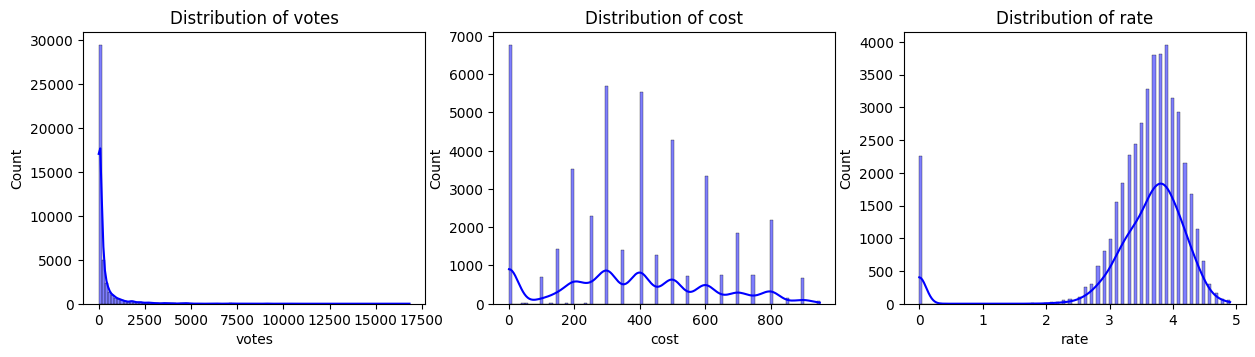

In [115]:
features= ['votes', 'cost','rate']
plt.figure(figsize = (15 , 12))
for i , feature in enumerate(features,1):
    plt.subplot(len(features),3,i)
    plt.title(f"Distribution of {feature}")
    sns.histplot(zomato_df1[feature].dropna(),color='blue', kde=True,bins=100)

- votes has right tail distribution
- rate has 0 value that was replaced with '-' and new values

#### Distribution of one categorical feature

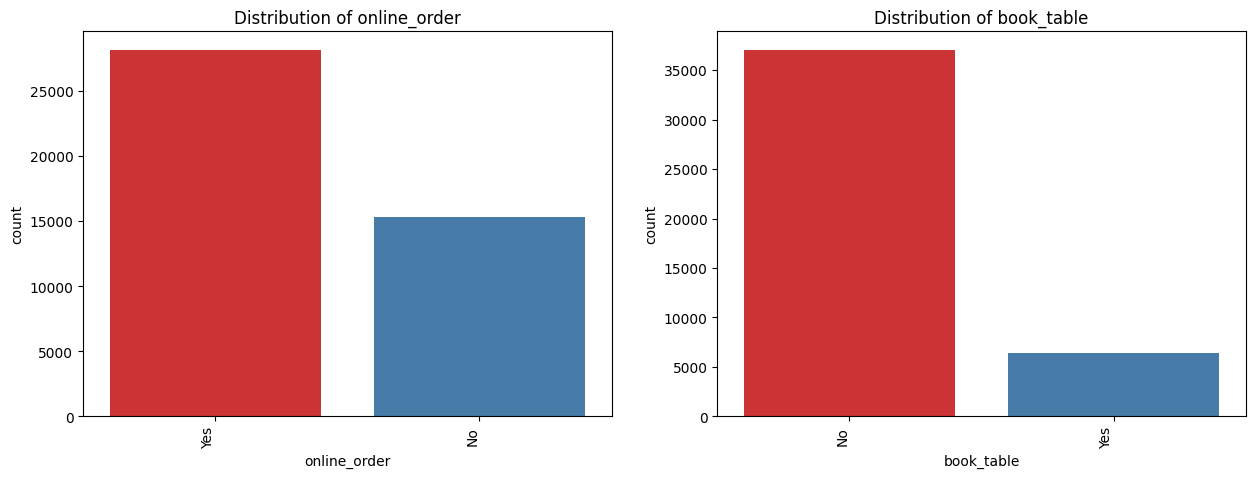

In [114]:
features= ['online_order', 'book_table']
plt.figure(figsize = (15 , 5))
for i , feature in enumerate(features,1):
    plt.subplot(len(features) //2,2,i)
    plt.title(f"Distribution of {feature}")
    g = sns.countplot(x=feature,data=zomato_df1, palette = "Set1",order = zomato_df1[feature].value_counts().index)
    g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

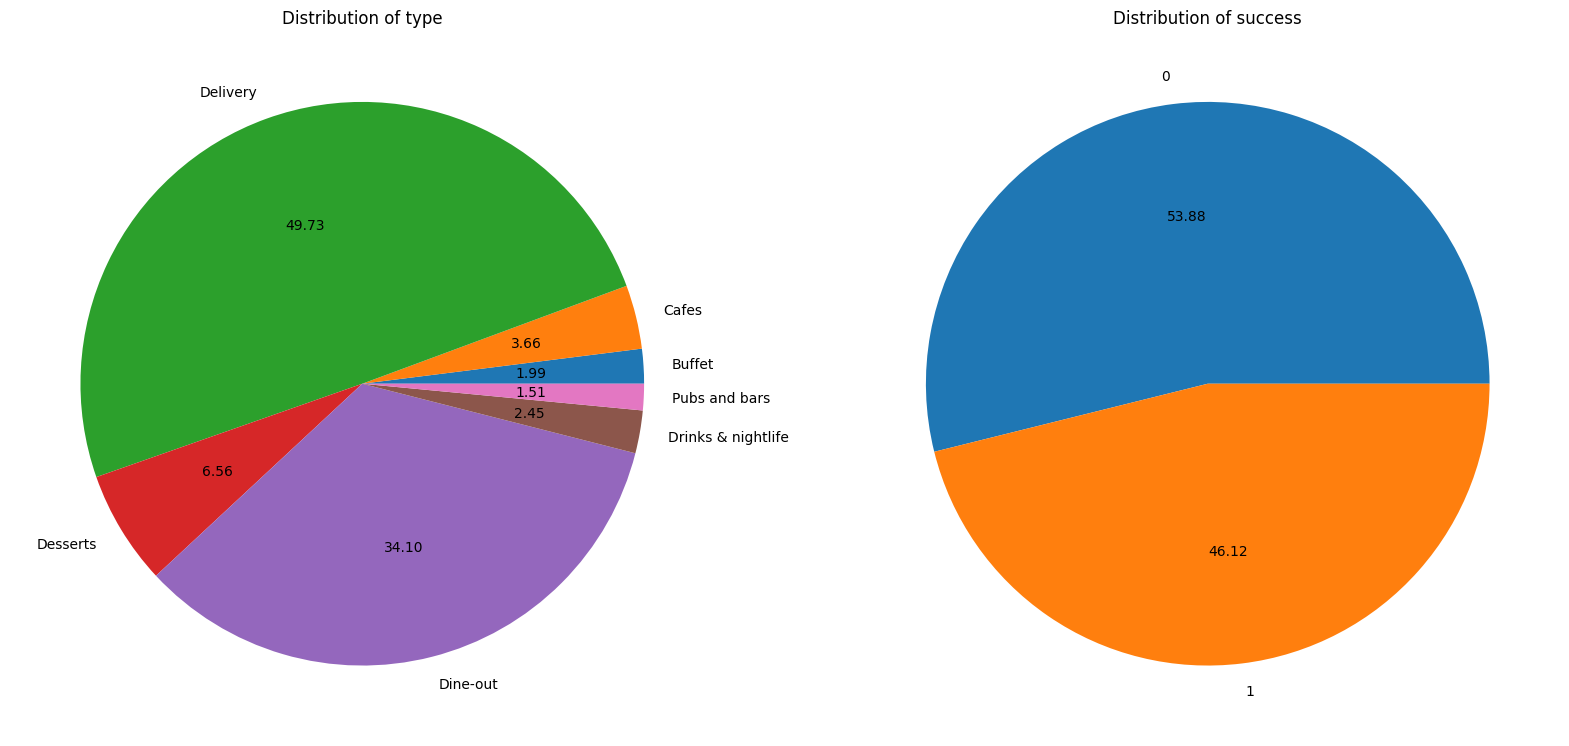

In [111]:
features= ['type', 'success']
plt.figure(figsize = (20 , 10))
for i , feature in enumerate(features,1):
    plt.subplot(len(features) //2,2,i)
    plt.title(f"Distribution of {feature}")
    zomato_df1.groupby(feature).size().plot(kind='pie', autopct='%.2f')

#### Are the locations of restaurants localised to specific parts of city?

Text(0.5, 1.0, 'city')

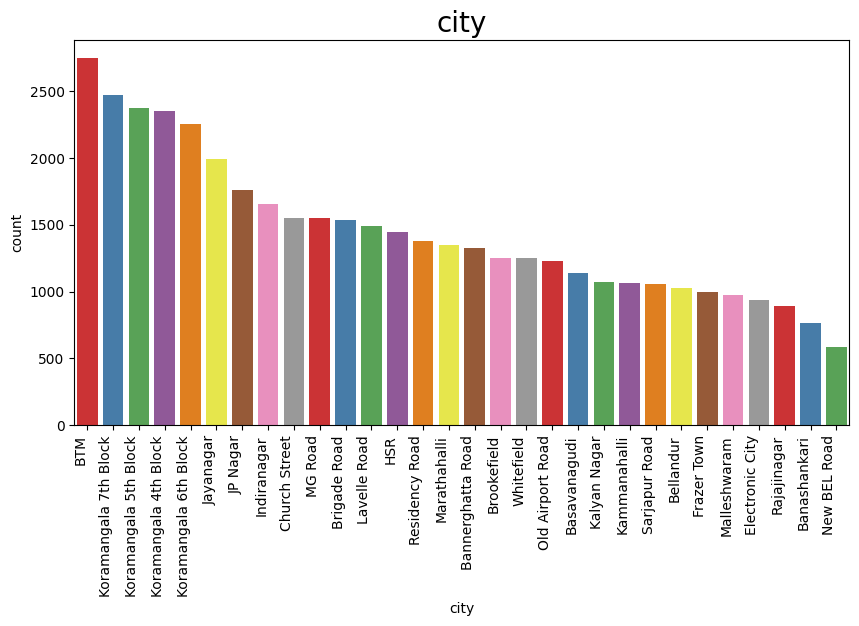

In [45]:
plt.figure(figsize = (10,5))
g = sns.countplot(x="city",data=zomato_df1, palette = "Set1",order = zomato_df1['city'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('city',size = 20)

#### Restaurant type distribution plot

Text(0.5, 1.0, 'rest_type')

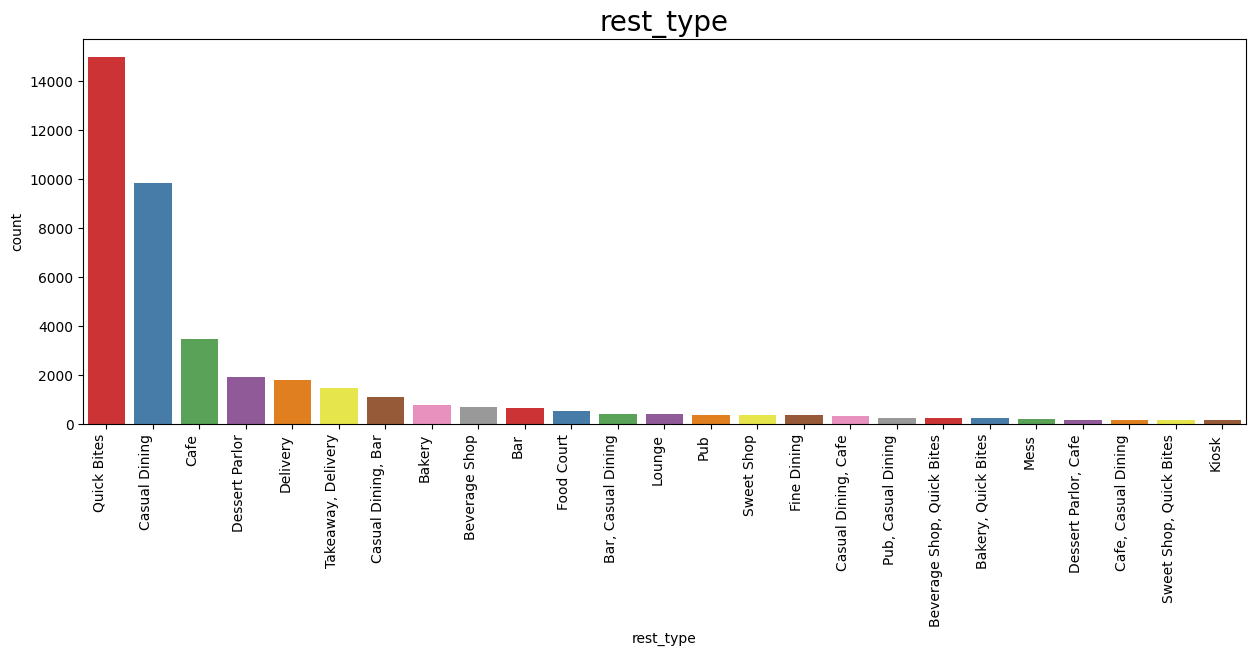

In [46]:
plt.figure(figsize = (15,5))
g = sns.countplot(x="rest_type",data=zomato_df1, palette = "Set1",order = zomato_df1['rest_type'].value_counts().iloc[:25].index)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('rest_type',size = 20)
# only top 25 out of 93 rest_type is dataset

Text(0.5, 1.0, 'cuisines')

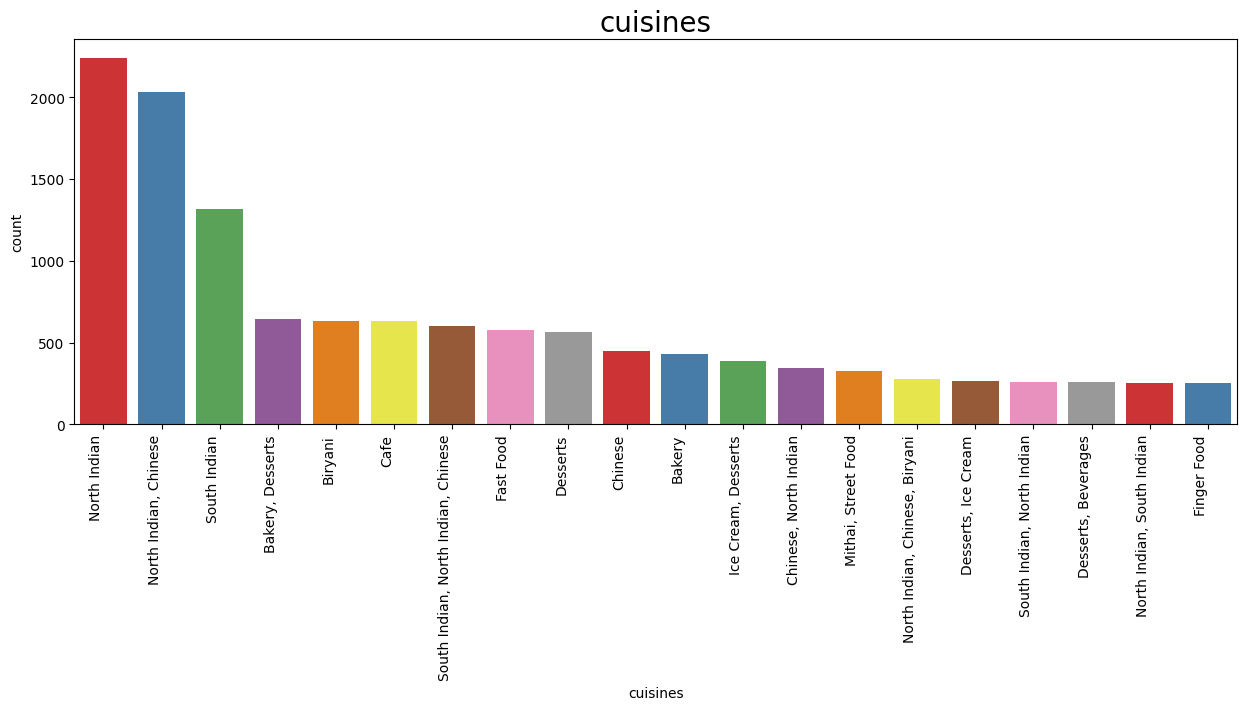

In [47]:
plt.figure(figsize = (15,5))
g = sns.countplot(x="cuisines",data=zomato_df1, palette = "Set1",order = zomato_df1['cuisines'].value_counts().iloc[:20].index)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('cuisines',size = 20)
# only top 20 out of more than 2000 cuisien is dataset

#### Frequency of each Cuisine type in Cuisines column

In [48]:
zomato_df1['cuisines'].to_list()[:10] # check 10 rows of cuisines to see separators

['North Indian, Mughlai, Chinese',
 'Chinese, North Indian, Thai',
 'Cafe, Mexican, Italian',
 'South Indian, North Indian',
 'North Indian, Rajasthani',
 'North Indian',
 'North Indian, South Indian, Andhra, Chinese',
 'Pizza, Cafe, Italian',
 'Cafe, Italian, Continental',
 'Cafe, Mexican, Italian, Momos, Beverages']

In [49]:
# frequncy of repeating cuisines name in the dataframe
frequency = {}
for sentence in zomato_df1['cuisines'].to_list():
    sentence = sentence.strip().lower()
    sentence_sub = sentence.split(',')
    for key in sentence_sub:
        key = key.strip()
        frequency[key] = frequency.get(key, 0) + 1

In [50]:
df_frequency = pd.DataFrame.from_dict(frequency, orient='index', columns=['frequency']).reset_index()

In [51]:
df_frequency['index'].nunique()

106

- 106 different cuisine type

In [52]:
# most 10 frequent cuisines in dataset 
df_frequency.sort_values('frequency', ascending=False).head(10)

,index,frequency
0,north indian,18185
2,chinese,13516
7,south indian,6885
14,fast food,6759
11,continental,5437
21,biryani,5313
4,cafe,4962
20,desserts,4732
13,beverages,4064
6,italian,3258


# Multi/Bi variate

In [53]:
# get success rate of 'north indian' cuisine
zomato_df1['north_indian'] = zomato_df1['cuisines'].str.contains('north indian', case=False, na=False)
zomato_df1.groupby('success').agg({'north_indian': 'sum'})

,north_indian
success,
0,10814
1,7371


- the number of highly rated resturants that offer north indian cuisine is less than the number of poorly rated ones although north indian is the most frequent cuisine in dataset

In [54]:
# name and rate of top rated resturants that offers north indian cuisine
df1=zomato_df1[['name','cuisines', 'rate','cost']][(zomato_df1['success'] == 1) & (zomato_df1['north_indian'] == 1)].sort_values('rate', ascending=False)
pd.set_option("max_colwidth", 100)
df1.drop_duplicates(subset='name', inplace=True) # remove duplicate in resturant name
df1.head(10).reset_index(drop=True)

,name,cuisines,rate,cost
0,Byg Brewski Brewing Company,"Continental, North Indian, Italian, South Indian, Finger Food",4.9,1.6
1,Abs Absolute Barbecues,"European, Mediterranean, North Indian, BBQ",4.9,1.6
2,Punjab Grill,"North Indian, Mughlai",4.9,2.0
3,Flechazo,"Asian, Mediterranean, North Indian, BBQ",4.9,1.4
4,Biergarten,"Continental, North Indian, Chinese, European, BBQ, Finger Food, Asian",4.8,2.1
5,House Of Commons,"Continental, Asian, North Indian",4.8,1.0
6,The Black Pearl,"North Indian, European, Mediterranean, BBQ",4.8,1.5
7,The Globe Grub,"Continental, North Indian, Asian, Italian",4.8,1.3
8,Barbeque Nation,"North Indian, European, Mediterranean, BBQ, Kebab",4.8,1.6
9,Hammered,"North Indian, Thai, Japanese, Continental, Cafe",4.7,1.3


In [55]:
# get success rate of 'chinese' cuisine
zomato_df1['chinese'] = zomato_df1['cuisines'].str.contains('chinese', case=False, na=False)
zomato_df1.groupby('success').agg({'chinese': 'sum'})

,chinese
success,
0,8257
1,5259


In [56]:
# name and rate of top rated resturants that offers chinese cuisine
df1=zomato_df1[['name','cuisines', 'rate','cost']][(zomato_df1['success'] == 1) & (zomato_df1['chinese'] == 1)].sort_values('rate', ascending=False)
pd.set_option("max_colwidth", 100)
df1.drop_duplicates(subset='name', inplace=True) # remove duplicate in resturant name
df1.head(10).reset_index(drop=True)

,name,cuisines,rate,cost
0,Asia Kitchen By Mainland China,"Asian, Chinese, Thai, Momos",4.9,1.5
1,Biergarten,"Continental, North Indian, Chinese, European, BBQ, Finger Food, Asian",4.8,2.1
2,The Big Barbeque,"BBQ, North Indian, Continental, Chinese",4.7,1.5
3,Echoes Koramangala,"Chinese, American, Continental, Italian, North Indian",4.7,750.0
4,Mainland China,"Chinese, Momos",4.7,1.7
5,You Mee,"Sushi, Japanese, Chinese, Thai",4.7,2.0
6,Vanilla Sky,"Chinese, Continental, North Indian, Finger Food",4.7,1.2
7,Tipsy Bull The Bar Exchange,"Chinese, Continental, North Indian, Mexican",4.6,1.4
8,Stories,"Continental, North Indian, Chinese",4.6,1.1
9,The Reservoire,"Continental, North Indian, Chinese, American",4.6,1.3


- note that rating of chinese is less than ratings of north indian and one of them is of high cost 

In [57]:
# zomato_df1['name'][(zomato_df1['success'] == 1) & (zomato_df1['chinese'] == 1)].head(10)

#### Is there a relation between online order option and rating of the restaurant?

Text(0.5, 1.0, 'online order vs rate')

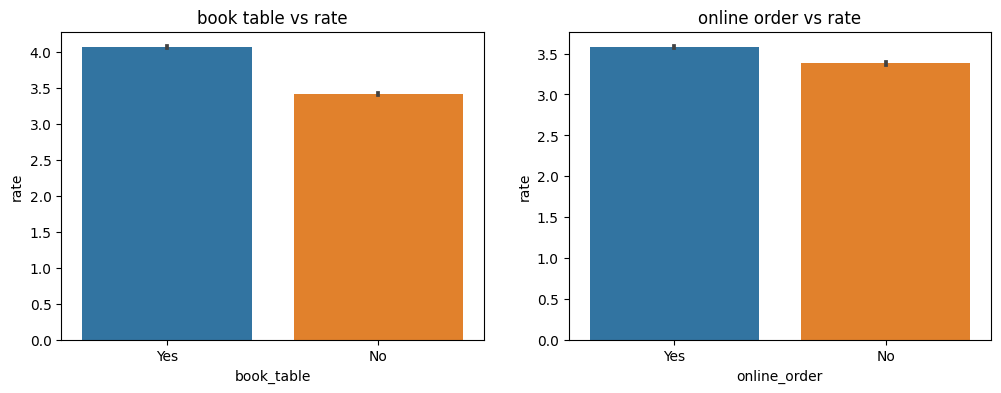

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.barplot(x = 'book_table', y = "rate" , data = zomato_df1, ax = ax1).set_title('book table vs rate')
sns.barplot(x = 'online_order', y = "rate" , data = zomato_df1, ax = ax2).set_title('online order vs rate')

-  resturants are more likely to receive a higher rating if your restaurant offers online order option and table booking option.

#### Distribution of votes and cost for highly rated vs low rated resturants

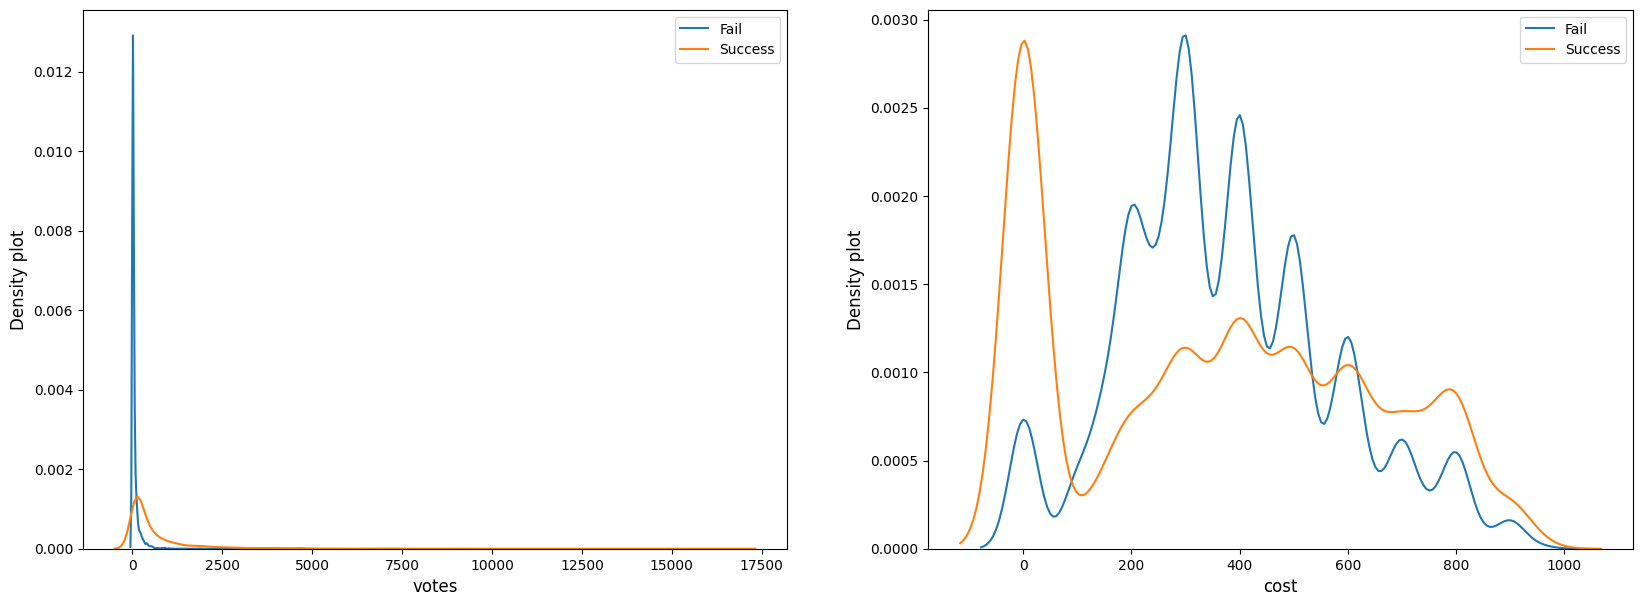

In [116]:
var=['votes','cost']
plt.figure(figsize = (20 , 7))
for i, feature in enumerate(var,1):
    plt.subplot(len(var) //2,2,i)
    sns.kdeplot(zomato_df1.loc[zomato_df1['success'] == 0, feature], label="Fail")
    sns.kdeplot(zomato_df1.loc[zomato_df1['success'] == 1, feature], label="Success")
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.legend()
plt.show()

- the higher the cost the lower the rating till a certain limit above which the higher the cost the higher the rating

#### Distribution of highy rated (above 3.75) resturants among different locations by their type and cost

In [60]:
plt.figure(figsize = (40 , 80))
fig=px.scatter(zomato_df1[zomato_df1.success == 1], x='type', y='rate', size='cost', color="online_order",
               hover_name='name', animation_frame="location")
# slow down animation speed
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

<Figure size 4000x8000 with 0 Axes>

#### Highest 35 restaurant types with regards to their average Cost 

<function matplotlib.pyplot.show(close=None, block=None)>

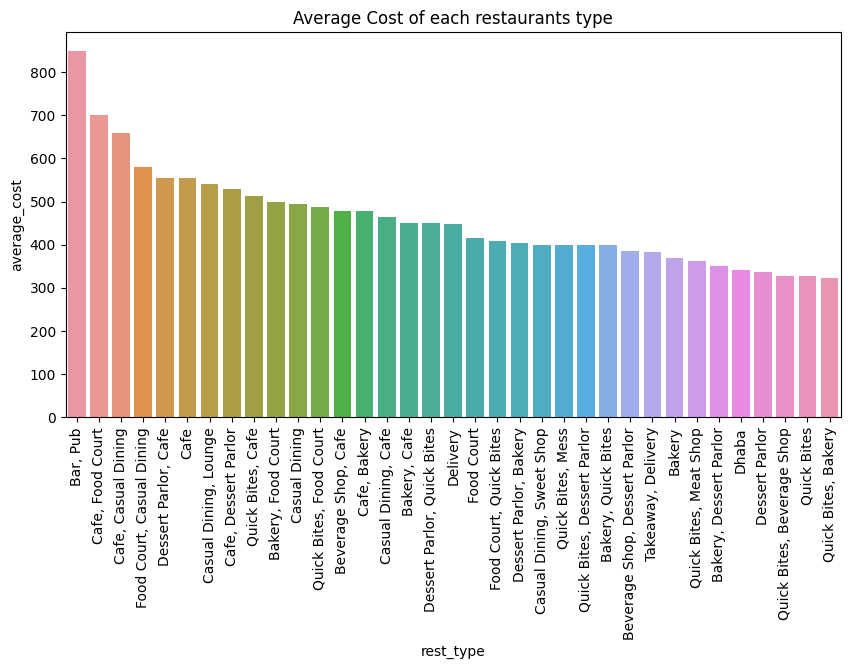

In [61]:
df2=zomato_df1.groupby(['rest_type']).agg({'cost': 'mean'}).sort_values('cost', ascending=False).reset_index().rename(columns={'cost':'average_cost'})
df3=df2.head(35)
plt.figure(figsize = (10,5))
sns.barplot(x = 'rest_type', y = "average_cost" , data = df3).set_title('Average Cost of each restaurants type')
plt.xticks(rotation=90)
plt.show

Text(0.5, 1.0, 'Distribution of Average Cost')

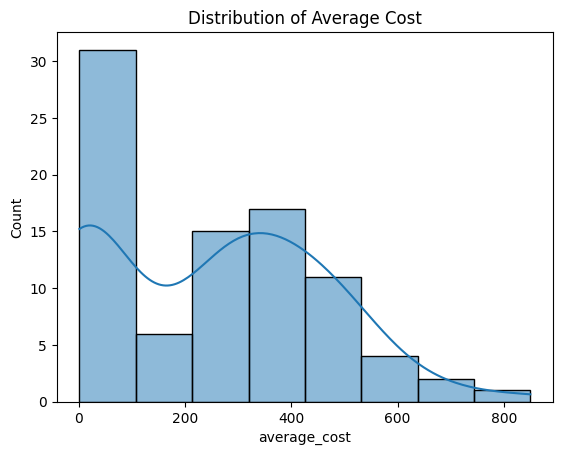

In [62]:
sns.histplot(df2['average_cost'], kde=True).set_title('Distribution of Average Cost')

#### Cities of highest 35 rated restaurant types

In [63]:
df4=zomato_df1.groupby(['city','rest_type','cuisines']).agg({'rate': 'mean'}).sort_values('rate', ascending=False).reset_index().rename(columns={'rate':'average_rate'}).head(25)
df4

,city,rest_type,cuisines,average_rate
0,BTM,Casual Dining,"European, Mediterranean, North Indian, BBQ",4.9
1,Whitefield,Casual Dining,"Asian, Mediterranean, North Indian, BBQ",4.9
2,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",4.9
3,Koramangala 6th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",4.9
4,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indian, Finger Food",4.9
5,Koramangala 7th Block,Casual Dining,"European, Mediterranean, North Indian, BBQ",4.9
6,Jayanagar,Casual Dining,"European, Mediterranean, North Indian, BBQ",4.9
7,Bellandur,Microbrewery,"Continental, North Indian, Italian, South Indian, Finger Food",4.9
8,Brookefield,Casual Dining,"Asian, Mediterranean, North Indian, BBQ",4.9
9,JP Nagar,Casual Dining,"European, Mediterranean, North Indian, BBQ",4.9


#### highly rated resturants that cost below average and have votes above average

In [64]:
sub=zomato_df1[(zomato_df1['votes']>zomato_df1['votes'].mean()) &
           (zomato_df1['cost']<zomato_df1['cost'].mean()) &
           (zomato_df1['rate']>4.5)].sort_values('rate', ascending=False).reset_index().head(25)
sub[['name','city','rate','votes','cuisines','online_order','book_table']]

,name,city,rate,votes,cuisines,online_order,book_table
0,Abs Absolute Barbecues,Jayanagar,4.9,6404,"European, Mediterranean, North Indian, BBQ",No,Yes
1,Asia Kitchen By Mainland China,Koramangala 6th Block,4.9,2244,"Asian, Chinese, Thai, Momos",Yes,Yes
2,Byg Brewski Brewing Company,Sarjapur Road,4.9,16832,"Continental, North Indian, Italian, South Indian, Finger Food",Yes,Yes
3,Asia Kitchen By Mainland China,Koramangala 5th Block,4.9,2235,"Asian, Chinese, Thai, Momos",Yes,Yes
4,Asia Kitchen By Mainland China,Koramangala 5th Block,4.9,2235,"Asian, Chinese, Thai, Momos",Yes,Yes
5,Abs Absolute Barbecues,Koramangala 7th Block,4.9,6490,"European, Mediterranean, North Indian, BBQ",No,Yes
6,Asia Kitchen By Mainland China,Koramangala 7th Block,4.9,2254,"Asian, Chinese, Thai, Momos",Yes,Yes
7,Asia Kitchen By Mainland China,Koramangala 5th Block,4.9,2235,"Asian, Chinese, Thai, Momos",Yes,Yes
8,Flechazo,Brookefield,4.9,2745,"Asian, Mediterranean, North Indian, BBQ",No,Yes
9,Asia Kitchen By Mainland China,Koramangala 5th Block,4.9,2244,"Asian, Chinese, Thai, Momos",Yes,Yes


In [65]:
pd.pivot_table(
    zomato_df1,
    index=['city'],
    columns=['type'],
    values='votes',
    aggfunc = 'mean'
)

type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
city,,,,,,,
BTM,1599.794872,639.217391,254.544846,187.094595,362.781570,1420.954545,1302.795918
Banashankari,432.571429,281.583333,209.679426,86.980392,182.416988,350.714286,NaN
Bannerghatta Road,983.058824,201.578947,158.245283,81.807229,176.049412,1111.833333,NaN
Basavanagudi,980.066667,314.088889,237.007005,138.285714,244.741379,457.583333,NaN
Bellandur,1113.392857,118.666667,237.032787,93.828571,314.651090,2246.117647,1990.705882
Brigade Road,514.824561,519.840000,319.789207,238.386792,440.374552,1099.826667,485.180556
Brookefield,518.687500,183.968750,186.097143,127.338235,228.272953,1187.571429,NaN
Church Street,573.033333,518.910256,305.263158,229.303571,423.607973,1092.714286,881.676056
Electronic City,331.142857,106.818182,104.817102,64.274510,117.065445,198.523810,201.600000


In [66]:
zomato_df1.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'type', 'city', 'success',
       'north_indian', 'chinese'],
      dtype='object')

- will drop 'name' from the model as it has a lot of variance

In [67]:
zomato_df2=zomato_df1.drop(['name', 'rate','north_indian','chinese'],axis=1)

In [68]:
categorical_cols = zomato_df2.select_dtypes(include='object').columns
numerical_col = zomato_df2.select_dtypes(exclude = 'O').columns
print("categorical_cols:", categorical_cols)
print("numerical_col:", numerical_col)

categorical_cols: Index(['online_order', 'book_table', 'location', 'rest_type', 'cuisines',
       'type', 'city'],
      dtype='object')
numerical_col: Index(['votes', 'cost', 'success'], dtype='object')


<Axes: >

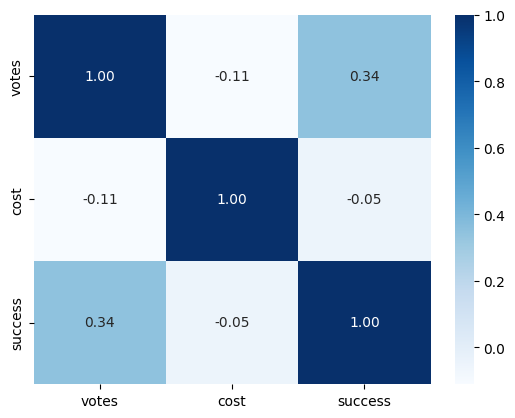

In [69]:
sns.heatmap(zomato_df2[numerical_col].corr(),annot=True,cmap='Blues', fmt='.2f')

- cost is negatively correlated with success while voets is positively correlated

In [70]:
x = zomato_df2.drop('success' , axis =1)
y = zomato_df2['success']

In [71]:
# classify categorical and numerical
def classification(var):
    # for any categorical variable with 2 unique categories
    cat_1=var.select_dtypes(include='object').loc[:, var.nunique() <= 2].columns

    # for any categorical variable with more than 2 unique categories
    cat_2=var.select_dtypes(include='object').loc[:, var.nunique() > 2].columns
    
    num = var.select_dtypes(exclude = 'O').columns
    
    return cat_1, cat_2, num

In [72]:
cat_1, cat_2, num = classification(x)

In [75]:
print(cat_1)
print(cat_2)
print(num)

Index(['online_order', 'book_table'], dtype='object')
Index(['location', 'rest_type', 'cuisines', 'type', 'city'], dtype='object')
Index(['votes', 'cost'], dtype='object')


# Data Preprocessing and model

In [76]:
# Data Preprocessing
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=
    [('le', OrdinalEncoder(), cat_1), # Label Encoding for any categorical variables with only 2 categories
     ('oe', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), cat_2), # One-Hot Encoding for any categorical variables with more than 2 categories
     #('be', ce.BinaryEncoder(), cat_3), # One-Hot Encoding for any categorical variables with more than 10 categories
     ('num', RobustScaler(), num) # Robust Scaler for numerical data since there are outliers
     ])

In [81]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

In [82]:
models=[]
models.append(("LR",LogisticRegression(max_iter=1000)))
models.append(("GNB",GaussianNB()))
models.append(("DTC",DecisionTreeClassifier()))
# models.append(("SVC",SVC(kernel='linear', gamma='auto')))
models.append(("KNN",KNeighborsClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("XGB",XGBClassifier()))

In [84]:
for model in models:
    steps = []
    steps.append(("preprocessing", preprocessor))
    steps.append(model)
    pipeline=Pipeline(steps=steps)
    res = cross_validate(pipeline,x,y,cv=5, scoring="accuracy", return_train_score=True)
    print(f"Model {model[0]} train acc is {res['train_score'].mean()}")
    print(f"Model {model[0]} test acc is {res['test_score'].mean()}")
    print("*" *100)

Model LR train acc is 0.8754747191768912
Model LR test acc is 0.8323705501221668
****************************************************************************************************
Model GNB train acc is 0.7764517328527124
Model GNB test acc is 0.7384177764804806
****************************************************************************************************
Model DTC train acc is 1.0
Model DTC test acc is 0.9351165640564284
****************************************************************************************************
Model KNN train acc is 0.9602561875579019
Model KNN test acc is 0.8964947784594915
****************************************************************************************************
Model RF train acc is 1.0
Model RF test acc is 0.9026632194111809
****************************************************************************************************
Model XGB train acc is 0.904510097042059
Model XGB test acc is 0.8530164999700031
********************************

- DecisionTreeClassifier provides higher accuracy than LogisticRegression but both need to account for overfitting

# Hyperparameter Tuning

In [85]:
from sklearn.model_selection import RandomizedSearchCV

# Tuning Decision Tree
dtree_params1 = {'max_leaf_nodes': [3, 6, 9],\
                "min_samples_split" : range(10,100,20),\
                "max_depth": range(1,15,2)}

dtree_params2 = {"min_samples_split" : range(10,100,20),\
                "max_depth": range(1,15,2)}

# Tuning LogisticRegression
lr_params= {"C":np.logspace(-1, 1, 10),"penalty":['l1', 'l2'], 'solver': ['liblinear']}

parameters=[dtree_params1, dtree_params2, lr_params]

models= [DecisionTreeClassifier(), DecisionTreeClassifier(), LogisticRegression()]

for model, parameter in zip(models, parameters):
    random_search=RandomizedSearchCV(model, parameter, cv=5, return_train_score=True)
    pipeline = Pipeline([('preprocessing', preprocessor),("random_search",random_search)])
    pipeline.fit(x,y)
    # Best Parameters
    print(model)
    print('Best Parameters: ', random_search.best_params_)
    print('Best Score: ', random_search.best_score_)
    print('='*50)

DecisionTreeClassifier()
Best Parameters:  {'min_samples_split': 70, 'max_leaf_nodes': 9, 'max_depth': 7}
Best Score:  0.8042213207948731
DecisionTreeClassifier()
Best Parameters:  {'min_samples_split': 30, 'max_depth': 13}
Best Score:  0.8512439693004966
LogisticRegression()
Best Parameters:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 3.593813663804626}
Best Score:  0.8429582844915485


In [87]:
models = [DecisionTreeClassifier(min_samples_split=70, max_depth=7, max_leaf_nodes=9),\
          DecisionTreeClassifier(min_samples_split=30, max_depth=13),\
          LogisticRegression(solver='liblinear', penalty='l1', C=4)]

names = ["DecisionTree1", "DecisionTree2","LogisticRegression"]

In [88]:
for name, model in zip(names, models):
    pipeline = Pipeline([('preprocessing', preprocessor),(name,model)])
    res = cross_validate(pipeline,x,y,cv=5, scoring="accuracy", return_train_score=True)
    print(name)
    print(f"Model {name} train acc is {res['train_score'].mean()}")
    print(f"Model {name} test acc is {res['test_score'].mean()}")
    print('='*50)

DecisionTree1
Model DecisionTree1 train acc is 0.8086807128345862
Model DecisionTree1 test acc is 0.8042213207948731
DecisionTree2
Model DecisionTree2 train acc is 0.876372408223474
Model DecisionTree2 test acc is 0.8514511224792376
LogisticRegression
Model LogisticRegression train acc is 0.8873397486796542
Model LogisticRegression test acc is 0.8421297432927444


- DecisionTree1 no overfitting but lowest accuracy of three models
- DecisionTree2 higher accuracy than DecisionTree1 but tends to overfit training data
- LogisticRegression higher accuracy than DecisionTree2 but tends to overfit training data even more
- DecisionTree2 is better but confusion matrix will help confirm

### Confussion matrices

In [90]:
for name, model in zip(names, models):
    pipeline = Pipeline([('preprocessing', preprocessor),(name,model)])
    y_pred = cross_val_predict(pipeline, x, y, cv=5)
    conf_mat = confusion_matrix(y, y_pred)
    print(name)
    print(classification_report(y, y_pred))
    print('='*50)

DecisionTree1
              precision    recall  f1-score   support

           0       0.79      0.86      0.83     23410
           1       0.82      0.74      0.78     20037

    accuracy                           0.80     43447
   macro avg       0.81      0.80      0.80     43447
weighted avg       0.81      0.80      0.80     43447

DecisionTree2
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     23410
           1       0.85      0.82      0.84     20037

    accuracy                           0.85     43447
   macro avg       0.85      0.85      0.85     43447
weighted avg       0.85      0.85      0.85     43447

LogisticRegression
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     23410
           1       0.86      0.79      0.82     20037

    accuracy                           0.84     43447
   macro avg       0.84      0.84      0.84     43447
weighted avg       0.84    

- need model with higher percesion which is DecisionTree2

# Features importance

In [91]:
pipeline = Pipeline(
     [
         ('preprocessing', preprocessor),
         ("dt",DecisionTreeClassifier(min_samples_split=30, max_depth=13))
     ]
 )
pipeline.fit(x,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('le', OrdinalEncoder(),
                                                  Index(['online_order', 'book_table'], dtype='object')),
                                                 ('oe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['location', 'rest_type', 'cuisines', 'type', 'city'], dtype='object')),
                                                 ('num', RobustScaler(),
                                                  Index(['votes', 'cost'], dtype='object'))])),
                ('dt',
                 DecisionTreeClassifier(max_depth=13, min_samples_split=30))])

In [104]:
new_cat_cols = pipeline.named_steps['preprocessing'].transformers_[1][1].get_feature_names_out(cat_2)
all_cols = np.concatenate([num, cat_1, new_cat_cols ])
print(all_cols)
len(all_cols)

['votes' 'cost' 'online_order' ... 'city_Residency Road'
 'city_Sarjapur Road' 'city_Whitefield']


2707

In [102]:
# Table of Feature Importance
importance = pipeline['dt'].feature_importances_.round(3)
list_of_features = list(zip(all_cols, importance))
features_imp = pd.DataFrame(list_of_features, columns=['Features', 'Importance']).sort_values('Importance', ascending=False)
features_imp=features_imp.head(30)
features_imp

,Features,Importance
2705,city_Sarjapur Road,0.749
2706,city_Whitefield,0.031
131,rest_type_Confectionery,0.018
1,cost,0.014
110,"rest_type_Beverage Shop, Quick Bites",0.010
1915,"cuisines_North Indian, Cafe, Fast Food, Beverages",0.008
57,location_Majestic,0.005
33,location_JP Nagar,0.005
48,location_Koramangala 5th Block,0.004
2671,type_Cafes,0.004


<Axes: xlabel='Importance', ylabel='Features'>

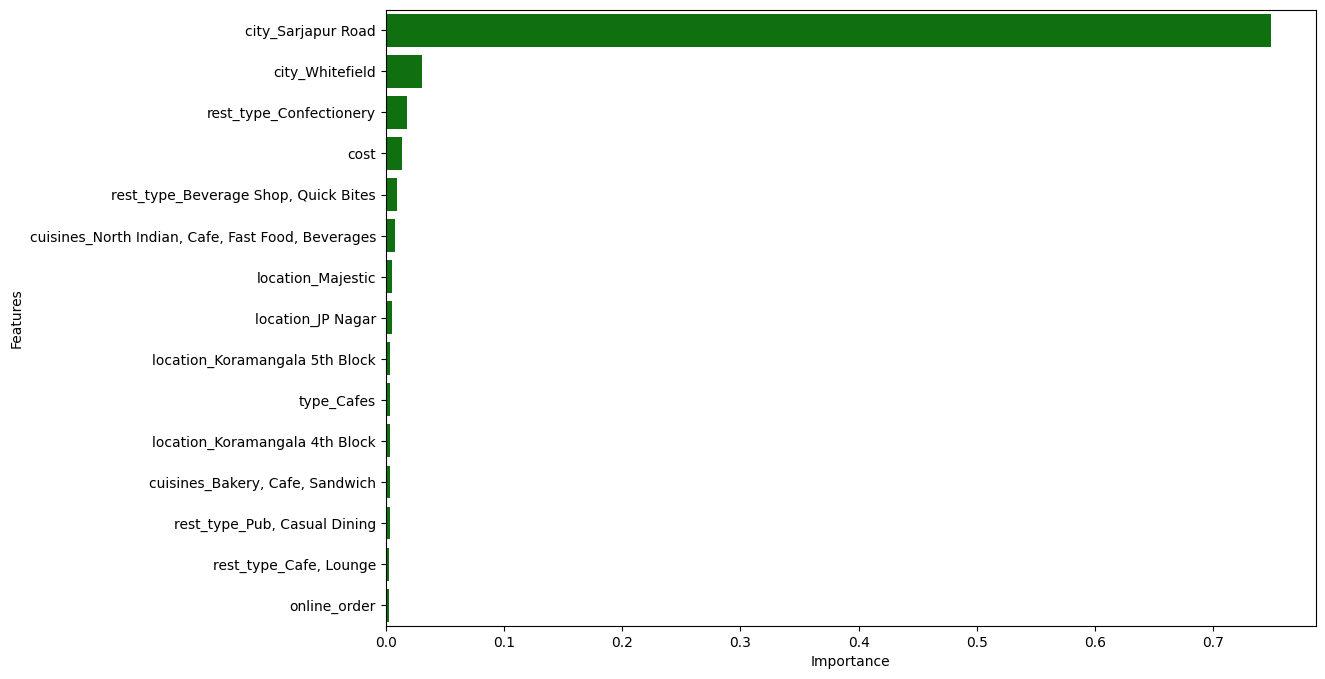

In [103]:
# Plotting Feature Importance
features_imp1=features_imp.head(15)
plt.figure(figsize=(12,8))
sns.barplot(x=features_imp1['Importance'], y=features_imp1['Features'], color="green")

### Model Saving

In [105]:
import joblib

In [106]:
joblib.dump(pipeline, 'Final_Model.pkl')

['Final_Model.pkl']

In [ ]:
joblib.dump(pipeline, 'Final_Model.pkl')

In [107]:
joblib.dump(x.columns, 'Final_Input.pkl')

['Final_Input.pkl']

In [108]:
x.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'type', 'city'],
      dtype='object')